In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(layer_input, network_input_size, network_output_size,
              activation_function=None):
    weights = tf.Variable(tf.random_normal([network_input_size, network_output_size]))
    # define some start value for the bias
    biases = tf.Variable(tf.zeros([1, network_output_size]) + 0.5)
    layer_output = tf.matmul(layer_input, weights) + biases
    if activation_function:
        return activation_function(layer_output)
    return layer_output

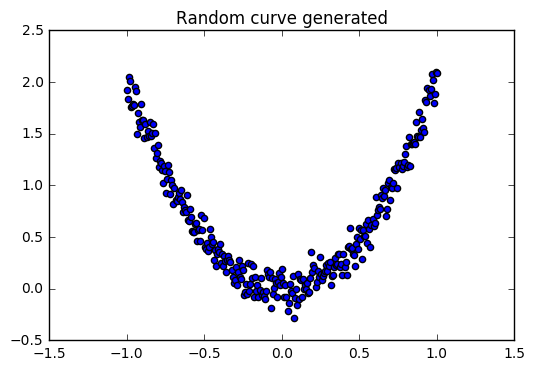

In [2]:
%matplotlib inline
num_rows = 300
X = np.linspace(-1, 1, num_rows).reshape(num_rows, 1)
Y = 2 * np.square(X) + 2 * np.random.normal(0, 0.05, num_rows).reshape(num_rows, 1)
plt.scatter(X, Y)
plt.title('Random curve generated')
plt.show()

In [3]:
# now generate placeholders for giving inputs to the network
# the float 32 is defined to avoid compatibility issues if any exist
# we add the 'None' in the placeholder so that while our network trains, it can accept 
# input of any size
# inputs given below are the same as the one we defined earlier
X_input = tf.placeholder(tf.float32, [None, 1])
Y_input = tf.placeholder(tf.float32, [None, 1])
learning_rate = 0.01
# now we add the first and only hidden layer
# we pass the size of the input to be 1, because, we are considering the whole input
# vector as one single point (so as to speak)
# we also, pass an output size of size 10 because we want to generate 10 outputs (neurons)
hidden_layer_1 = add_layer(X_input, 1, 10, tf.nn.relu)
# now we want to reduce the 10 input vectors (100*10) into one output / predicted vector
# we pass an activation function of None
output_layer_pred = add_layer(hidden_layer_1, 10, 1, None)
loss = tf.reduce_mean(tf.square(Y_input - output_layer_pred), 0)[0]
train_func = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Using matplotlib backend: Qt5Agg


C:\Users\balac\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


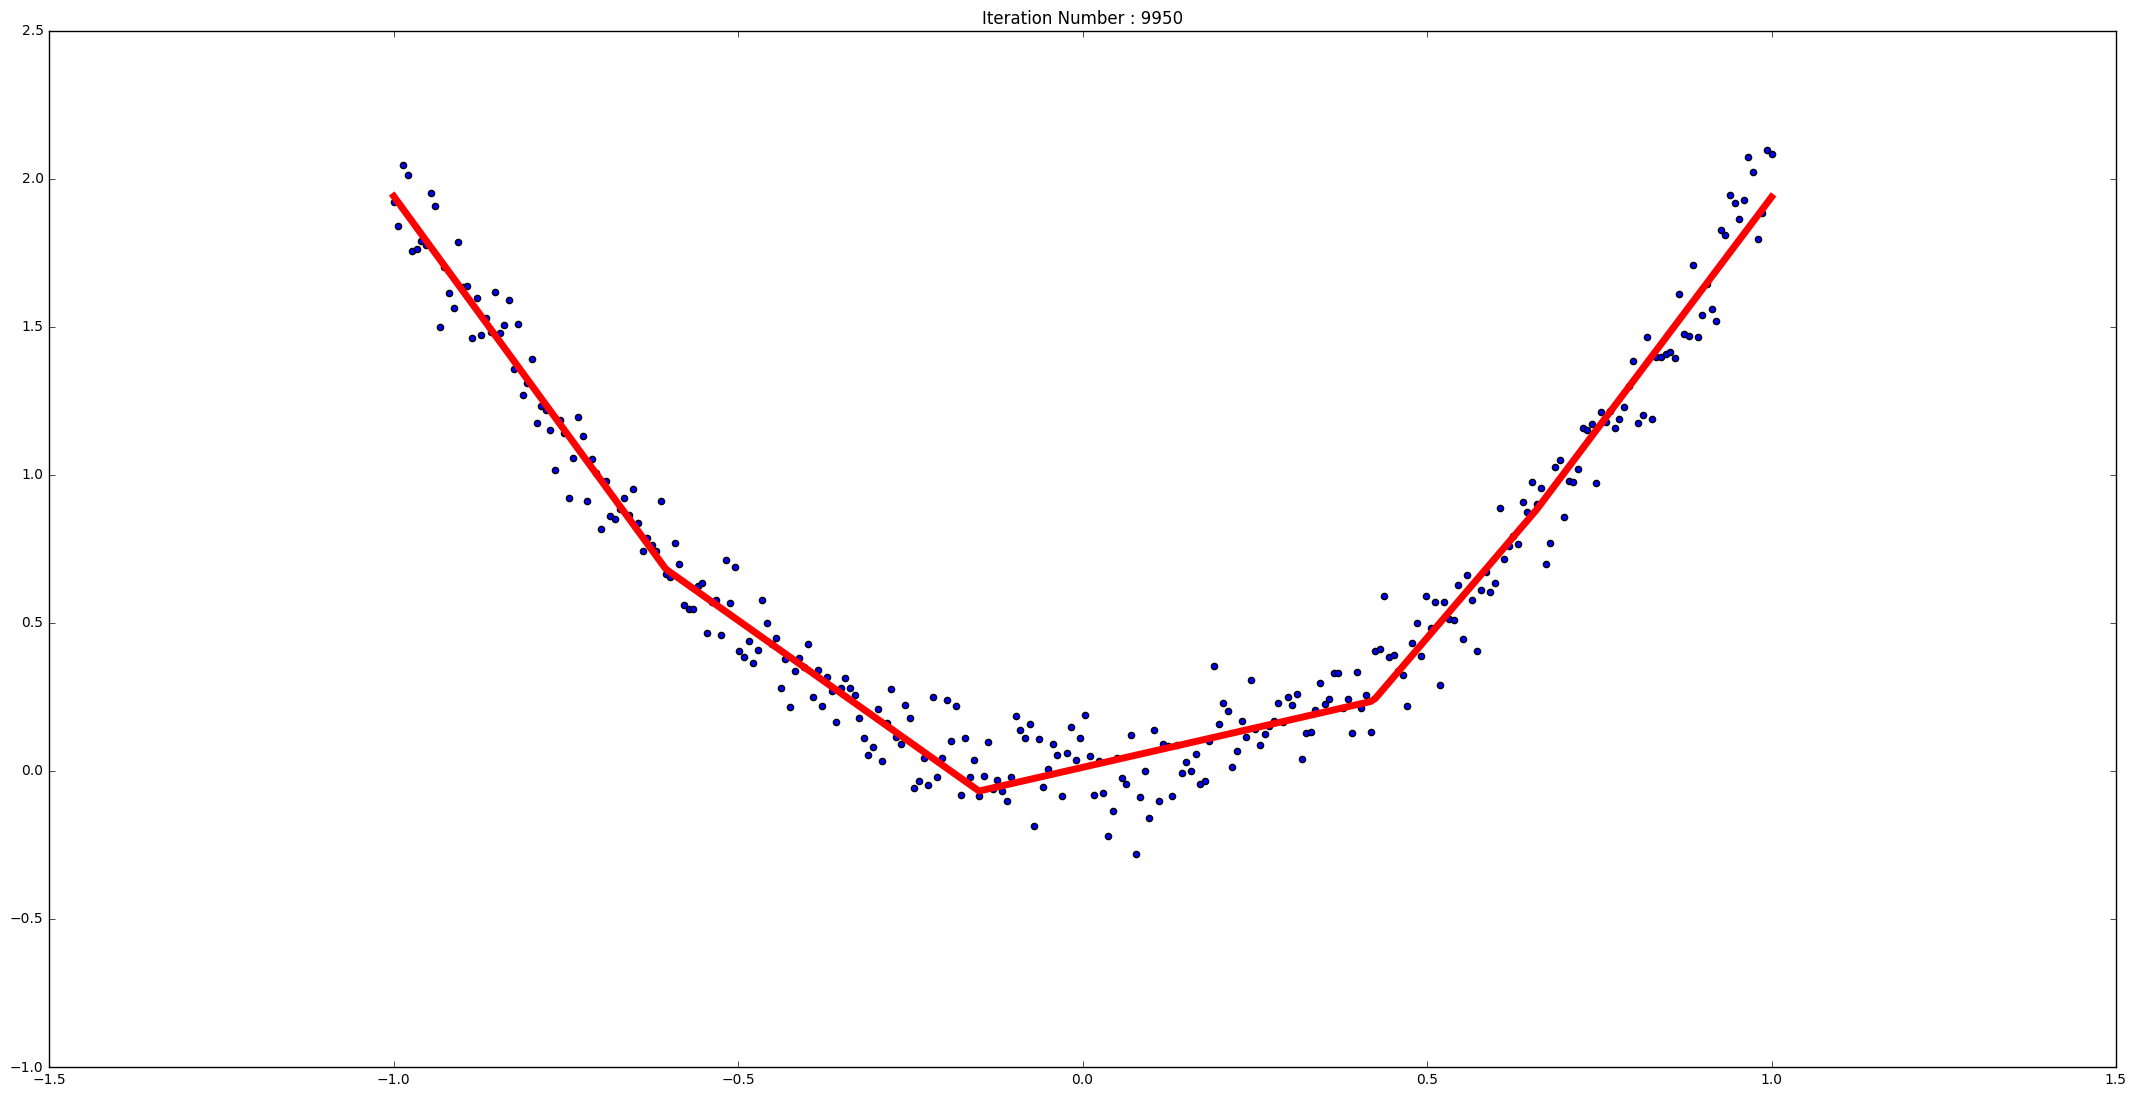

In [4]:
%matplotlib
iterations = 10000
pause_interval = 0.5
# for iteration in range(iterations):
with tf.Session() as session:
    init = tf.global_variables_initializer()
    session.run(init)
    fig = plt.figure()
    # plot for the prediction function
    axes0 = fig.add_subplot('111')
    axes0.scatter(X, Y)
    plt.ion()
    plt.show()
    
    for iteration in range(iterations):
        session.run(train_func, feed_dict={X_input: X, Y_input: Y})
        # prediction plot
        if iteration % 50 == 0:
            try:
                axes0.lines.remove(lines[0])
            except Exception:
                pass
            Y_predicted = session.run(output_layer_pred, feed_dict={X_input: X})
            plt.title('Iteration Number : ' + str(iteration))
            lines = axes0.plot(X, Y_predicted, c='r', lw=5)
            plt.pause(pause_interval)